# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ivan Chiari
- **Email:** ivan31@mhs.usk.ac.id
- **ID Dicoding:** ivan_chiari_new

## Menentukan Pertanyaan Bisnis

* Berapa jumlah penyewa sepeda tiap bulan?
* Bagaimana Tren pengguna bikesharing dari Januari 2011 - Desember 2012?
* Apakah ada perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan setiap bulannya?
* Pada jam berapa dalam sehari penggunaan sepeda mencapai puncaknya dan kapan penggunaan sepeda cenderung rendah?
* apakah jumlah penyewa sepeda meningkat pada musim tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# load dataset hour.csv
bike_df = pd.read_csv('data/hour.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [3]:
# informasi atribut dataset 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


kolom dari dateset ini terdiri dari 4 atribut bertipe float , 12 atribut bertipe integre, dan 1 tipe bertipe object. jumlah data dalam dataset adalah 17379 data

In [4]:
# cek missing value
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ditemukan missing value pada semua atribut

In [5]:
# cek duplikasi data
print("Jumlah duplikasi: ", bike_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data duplicat pada dataset bike sharing

In [6]:
# cek distribusi data
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


informasi diatas berisi tentang detail statistik seperti count, mean (rata rata), std (standar deviasi), mininmum, quartil 1, median, quartil 3, dan maksimum 

### Cleaning Data

untuk mempermudah analisis saya merubah kembali tipe data atribut yang sebaiknya kategori serta mengembalikan value dari numerik menjadi ke kategori sesuai pada Readme.txt

In [7]:
## Mengubah tipe data pada beberapa kolom
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'])
bike_df['season'] = bike_df.season.astype('category')
bike_df['mnth'] = bike_df.mnth.astype('category')
bike_df['yr'] = bike_df.yr.astype('category')
bike_df['holiday'] = bike_df.holiday.astype('category')
bike_df['weekday'] = bike_df.weekday.astype('category')
bike_df['workingday'] = bike_df.workingday.astype('category')
bike_df['weathersit'] = bike_df.weathersit.astype('category')


pada proses diatas kita melakukan beberapa hal yaitu:
1. Mengubah tipe data kolom dteday menjadi datetime
2. Mengubah tipe data kolom season, mnth, yr, holiday, weekday, workingday, dan weathersit menjadi category


In [8]:
# cek informasi atribut dataset setelah perubahan
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

berikut informmasi dataset setelah diubah tipe datanya, sekarang ada 7 tipe kategori, 1 data time, 4 data float, 5 data int

In [9]:
bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
# Konversi nilai untuk kolom 'season'
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
bike_df['season'] = bike_df['season'].map(season_map)

# Konversi nilai untuk kolom 'yr'
year_map = {0: 2011, 1: 2012}
bike_df['yr'] = bike_df['yr'].map(year_map)

# Mengganti nilai bulan
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
bike_df['mnth'] = bike_df['mnth'].map(month_map)

# Konversi nilai untuk kolom 'weathersit'
weather_map = {1: 'Clear', 2: 'Misty', 3: 'Light_RainSnow', 4: 'Heavy_RainSnow'}
bike_df['weathersit'] = bike_df['weathersit'].map(weather_map)

# Konversi nilai untuk kolom 'weekday'
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
bike_df['weekday'] = bike_df['weekday'].map(weekday_map)

# Konversi nilai untuk kolom 'workingday'
workingday_map = {0: 'No', 1: 'Yes'}
bike_df['workingday'] = bike_df['workingday'].map(workingday_map)


* konversi value dari season dari angka ke string seperti 1 menjadi Winter, 2 menjadi Spring, 3 menjadi Summer, dan 4 menjadi Fall.
* konversi value dari yr dari angka ke string seperti 0 menjadi 2011, dan 1 menjadi 2012.
* konversi value dari mnth dari angka ke string seperti 1 menjadi Jan, 2 menjadi Feb, dan seterusnya.
* konversi value dari weathersit dari angka ke string seperti 1 menjadi Clear, 2 menjadi Misty, 3 menjadi Light_RainSnow, dan 4 menjadi Heavy_RainSnow.
* konversi value dari weekday dari angka ke string seperti 0 menjadi Sunday, 1 menjadi Monday, dan seterusnya.

In [11]:
# Drop kolom yang tidak digunakan dalam data analisis
data_cleaned = bike_df.drop("instant", axis=1)
data_cleaned.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


setelah merubah value dari beberapa variabel, sekarang menbuang kolom yang tidak digunakan dalam analisis data yaitu kolom 'instant' yang merupakan index dari dataset

In [12]:
# Memperbaiki nama kolom yang kurang jelas
data_cleaned.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count",
    'hr':'hour'}, inplace=True
)

Untuk data numerik seperti Temperature, Atemp, humidity dan windspeed agar analisis lebih jelas dikembalikan ke nilai dasar sebelum dinormalisasi agar lebih aktual
untuk kejelasan perhitungan bisa di referensi ke file Readme.md

In [13]:
# Normalisasi kembali ke dalam nilai yang belum dinormalisasi
data_cleaned['temp'] = data_cleaned['temp'] * 41
data_cleaned['atemp'] = data_cleaned['atemp'] * 50
data_cleaned['humidity'] = data_cleaned['humidity'] * 100
data_cleaned['windspeed'] = data_cleaned['windspeed'] * 67

mengembalikan data numerik ke dalam nilai semula seperti variabel 'temp' dikali 41, 'atemp' dikali 50, 'humidity' dikali 100, dan 'windspeed' dikali 67.

In [14]:
# isi data yang telah dirubah
data_cleaned.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Winter,2011,Jan,0,0,Saturday,No,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Winter,2011,Jan,1,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Winter,2011,Jan,2,0,Saturday,No,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Winter,2011,Jan,3,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Winter,2011,Jan,4,0,Saturday,No,Clear,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
# Periksa struktur data, jumlah baris dan kolom
print("Shape of the dataset:", data_cleaned.shape)

# Periksa tipe data dari setiap kolom
print("Data types of each column:")
print(data_cleaned.dtypes)


Shape of the dataset: (17379, 16)
Data types of each column:
date           datetime64[ns]
season               category
year                 category
month                category
hour                    int64
holiday              category
weekday              category
workingday           category
weather              category
temp                  float64
atemp                 float64
humidity              float64
windspeed             float64
casual                  int64
registered              int64
total_count             int64
dtype: object


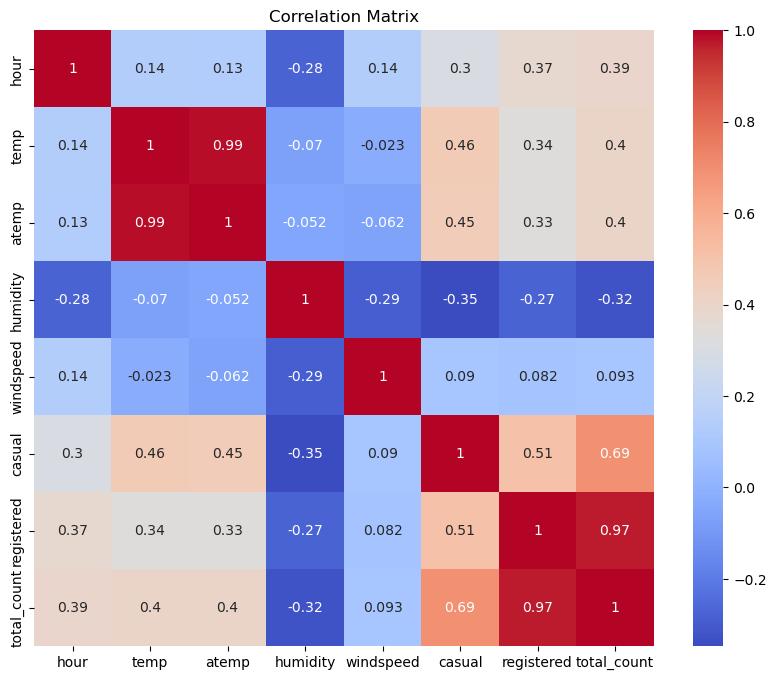

In [16]:
# Matriks korelasi antar variabel numerik
correlation_matrix = data_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


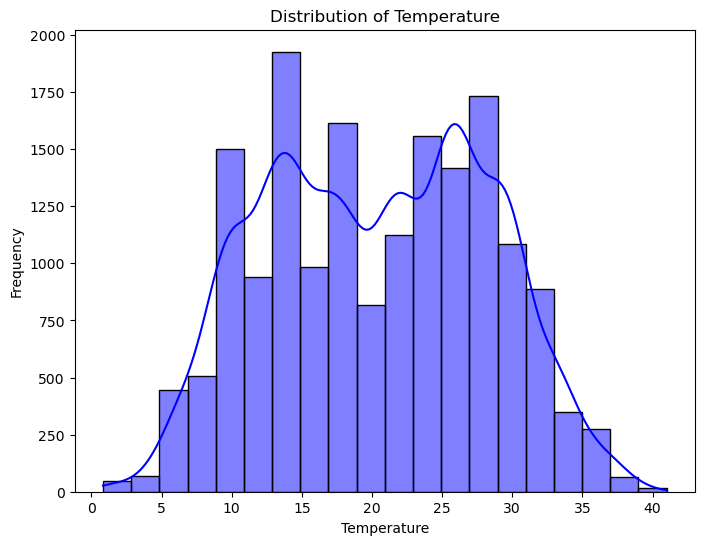

In [17]:
# Histogram untuk distribusi variabel numerik
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['temp'], bins=20, kde=True, color='blue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

distribusi data temperature cukup normal , dimana persebaran paling banyak ada di antara 10 celcius - 30 celcius

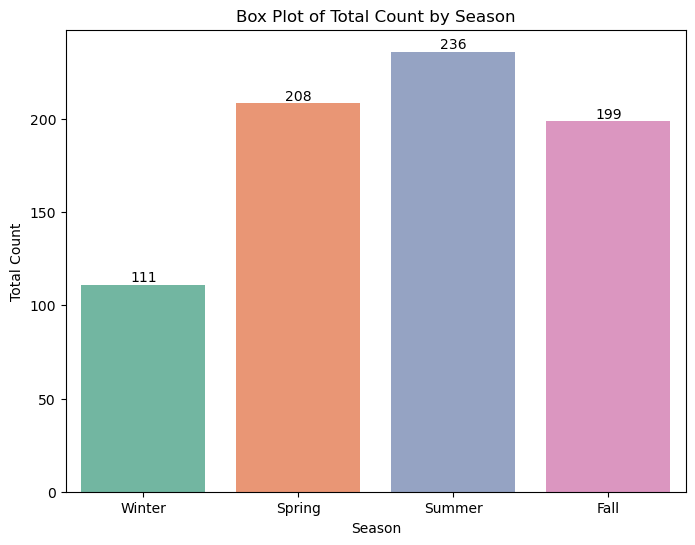

In [18]:
# Box plot untuk melihat sebaran variabel numerik
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='season',y='total_count', data=data_cleaned, palette='Set2',errorbar=None)
plt.title('Box Plot of Total Count by Season')
plt.xlabel('Season')
plt.ylabel('Total Count')

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
plt.show()

pada musim panas pengguna bike sharing paling banyak

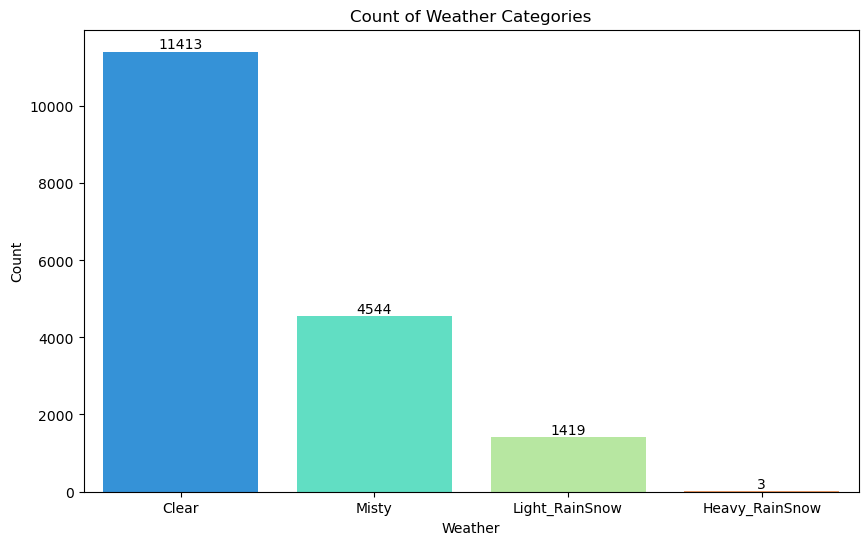

In [19]:
# Bar plot untuk distribusi variabel kategorikal
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='weather', data=data_cleaned, palette='rainbow')
plt.title('Count of Weather Categories')
plt.xlabel('Weather')
plt.ylabel('Count')

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()

sepertinya orang orang  lebih banyak menggunakan sepeda saat cuaca cerah

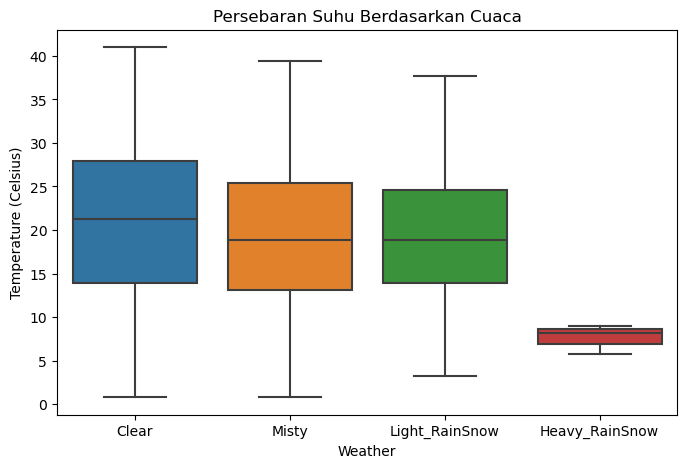

In [20]:
# Box plot untuk melihat sebaran variabel numerik
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather', y='temp', data=data_cleaned)
plt.title('Persebaran Suhu Berdasarkan Cuaca')
plt.xlabel('Weather')
plt.ylabel('Temperature (Celsius)')
plt.show()

hubungan cuaca dan temperatur tidak terlalu terlihat 

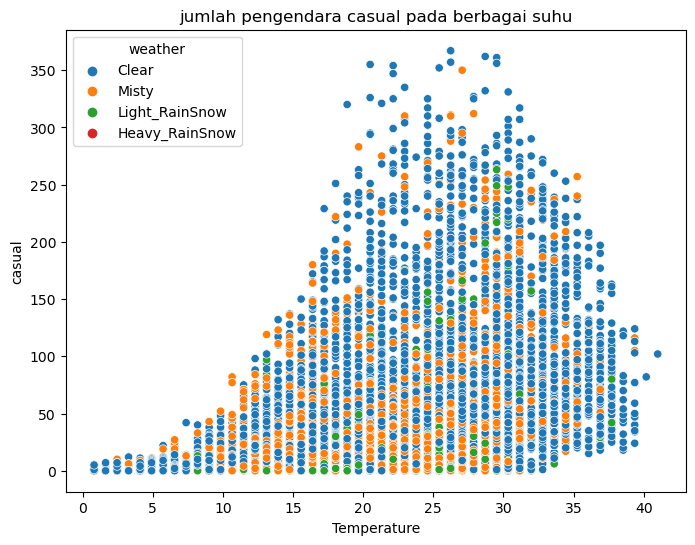

In [21]:
# Scatter plot untuk melihat hubungan temoerature dan penguna casual
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='casual', data=data_cleaned, hue='weather')
plt.title('jumlah pengendara casual pada berbagai suhu')
plt.xlabel('Temperature')
plt.ylabel('casual')
plt.show()

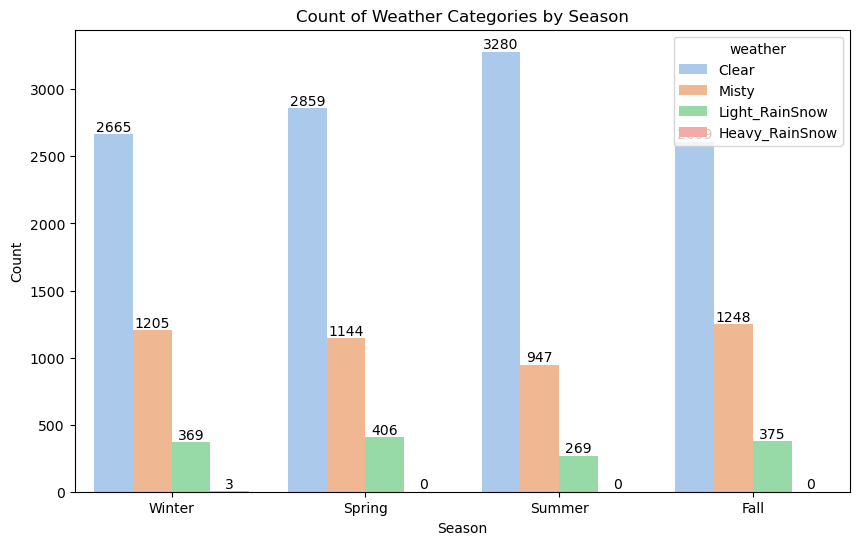

In [22]:
# Bar plot untuk distribusi cuaca tiao musim
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='season', hue='weather', data=data_cleaned, palette='pastel')

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.title('Count of Weather Categories by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

dari countplot di atas, kita dapat melihat bahwa cuaca yang cerah paling banyak terjadi di musim panas, sedangkan cuaca yang berkabut paling banyak terjadi di musim gugur.
dan dari keempat musim paling sering bercuaca cerah. untuk badai salju hanya ada di musim dingin

In [23]:
date_count = data_cleaned.groupby('date').agg({'total_count': 'sum'}).reset_index()
date_count

,date,total_count
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600
...,...,...
726,2012-12-27,2114
727,2012-12-28,3095
728,2012-12-29,1341
729,2012-12-30,1796


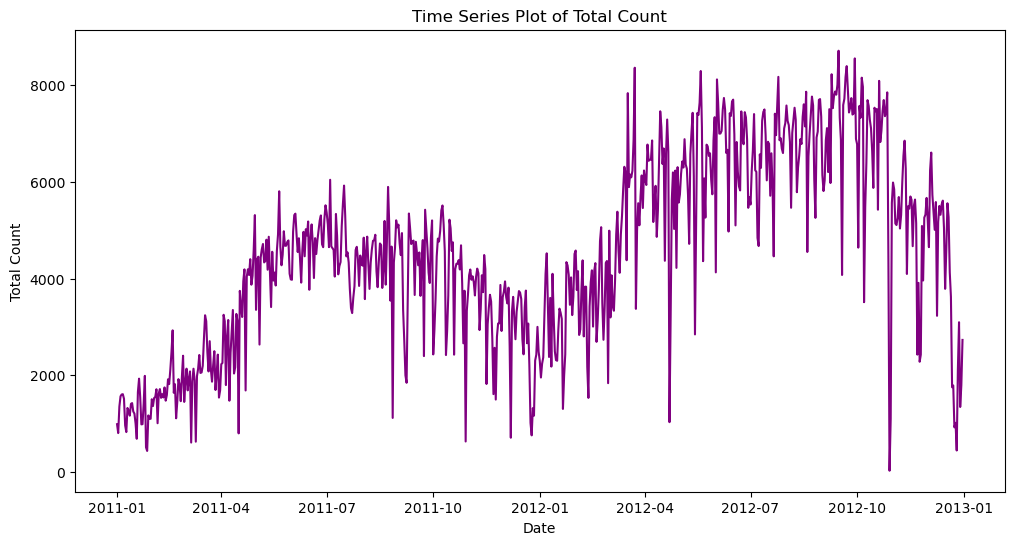

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_count', data=date_count, color='purple')
plt.title('Time Series Plot of Total Count')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.show()


In [25]:
weekly_average = date_count.resample('W', on='date').mean()
weekly_average

,total_count
date,
2011-01-02,893.000000
2011-01-09,1344.000000
2011-01-16,1289.285714
2011-01-23,1252.857143
2011-01-30,1099.857143
...,...
2012-12-09,5394.571429
2012-12-16,5138.000000
2012-12-23,3813.714286


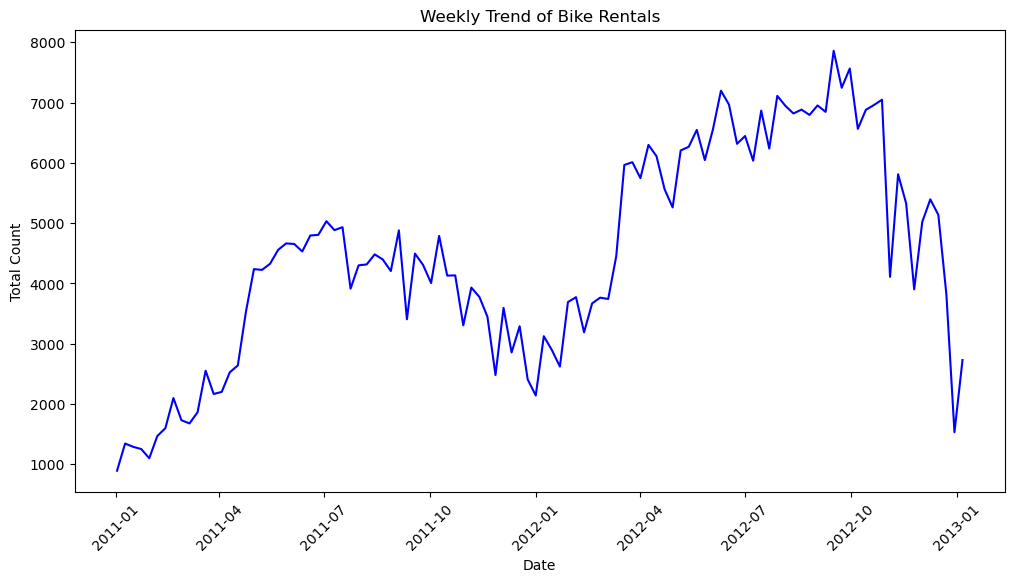

In [26]:
# # Menghitung rata-rata bergerak 7 hari untuk melihat tren mingguan
plt.figure(figsize=(12, 6))
sns.lineplot(x= 'date', y='total_count' ,data= weekly_average, color='blue')
plt.title('Weekly Trend of Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()


In [27]:
# jumlah 
monthly_counts = data_cleaned.groupby('month').agg({'total_count':'sum'}).reset_index()
monthly_counts

,month,total_count
0,Jan,134933
1,Feb,151352
2,Mar,228920
3,Apr,269094
4,May,331686
5,Jun,346342
6,Jul,344948
7,Aug,351194
8,Sep,345991
9,Oct,322352


In [28]:
yearly_counts = data_cleaned.groupby(['year','month']).agg({'total_count':'sum'}).reset_index()
yearly_counts

,year,month,total_count
0,2011,Jan,38189
1,2011,Feb,48215
2,2011,Mar,64045
3,2011,Apr,94870
4,2011,May,135821
5,2011,Jun,143512
6,2011,Jul,141341
7,2011,Aug,136691
8,2011,Sep,127418
9,2011,Oct,123511


In [29]:
monthly_weekday_counts = data_cleaned.groupby(['month', 'workingday']).agg(
    {'total_count': ['mean', 'sum']
     }).reset_index()
monthly_weekday_counts

month workingday total_count        
                           mean     sum
0    Jan         No   78.576628   41017
1    Jan        Yes  103.545755   93916
2    Feb         No   94.271028   40348
3    Feb        Yes  121.581599  111004
4    Mar         No  153.111386   61857
5    Mar        Yes  156.279701  167063
6    Apr         No  185.956250   89259
7    Apr        Yes  187.915361  179835
8    May         No  232.129386  105851
9    May        Yes  218.832364  225835
10   Jun         No  256.414216  104617
11   Jun        Yes  234.229651  241725
12   Jul         No  225.234127  113518
13   Jul        Yes  235.193089  231430
14   Aug         No  214.056604   79415
15   Aug        Yes  246.176630  271779
16   Sep         No  254.925000  122364
17   Sep        Yes  233.675026  223627
18   Oct         No  212.947917  102215
19   Oct        Yes  226.711637  220137
20   Nov         No  168.479167   80870
21   Nov        Yes  181.777429  173961
22   Dec         No  117.640719   58938
23   Dec        Yes  154.885947  152098

In [30]:
workingday= data_cleaned.groupby('workingday')['total_count'].sum()
workingday


workingday
No     1000269
Yes    2292410
Name: total_count, dtype: int64

In [31]:
hourly_usage = data_cleaned.groupby(['hour']).agg({'total_count':'sum'}).reset_index()
hourly_usage

,hour,total_count
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


In [32]:
# Group by date and season, calculate average temperature and total count
seasonal_data = data_cleaned.groupby(['date', 'season']).agg({
    'temp': 'mean',
    'total_count': 'sum'
    }).reset_index()
seasonal_data

,date,season,temp,total_count
0,2011-01-01,Winter,14.110833,985
1,2011-01-01,Spring,NaN,0
2,2011-01-01,Summer,NaN,0
3,2011-01-01,Fall,NaN,0
4,2011-01-02,Winter,14.902609,801
...,...,...,...,...
2919,2012-12-30,Fall,NaN,0
2920,2012-12-31,Winter,8.849167,2729
2921,2012-12-31,Spring,NaN,0
2922,2012-12-31,Summer,NaN,0


In [33]:
season_year = data_cleaned.groupby(by=['season', 'year']).agg('total_count').sum().reset_index()
season_year

,season,year,total_count
0,Winter,2011,150000
1,Winter,2012,321348
2,Spring,2011,347316
3,Spring,2012,571273
4,Summer,2011,419650
5,Summer,2012,641479
6,Fall,2011,326137
7,Fall,2012,515476


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa jumlah penyewa sepeda tiap bulan?

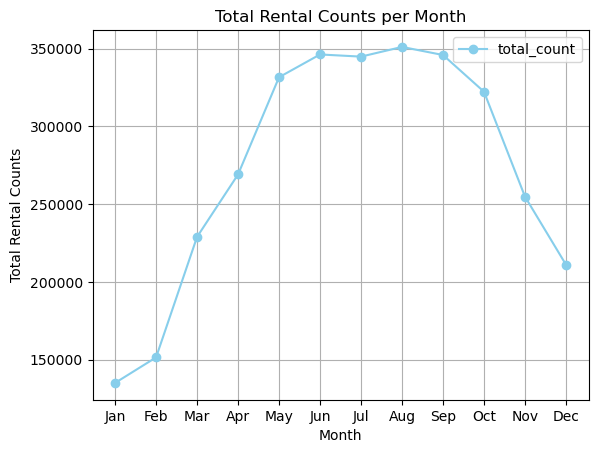

In [34]:
# jumlah total rental sepeda per bulan
monthly_counts.plot(x='month', y='total_count', kind='line', color='skyblue', marker='o')
plt.title('Total Rental Counts per Month')
plt.xlabel('Month')
plt.ylabel('Total Rental Counts')
plt.xticks(range(12), monthly_counts['month'])
plt.grid(True)
plt.show()


jumlah pengguna bike sharing mengalami peningkatan di bulan May, paling tinggi di bulan Agustus dan mulai mengalami penurunan di bulan Oktober

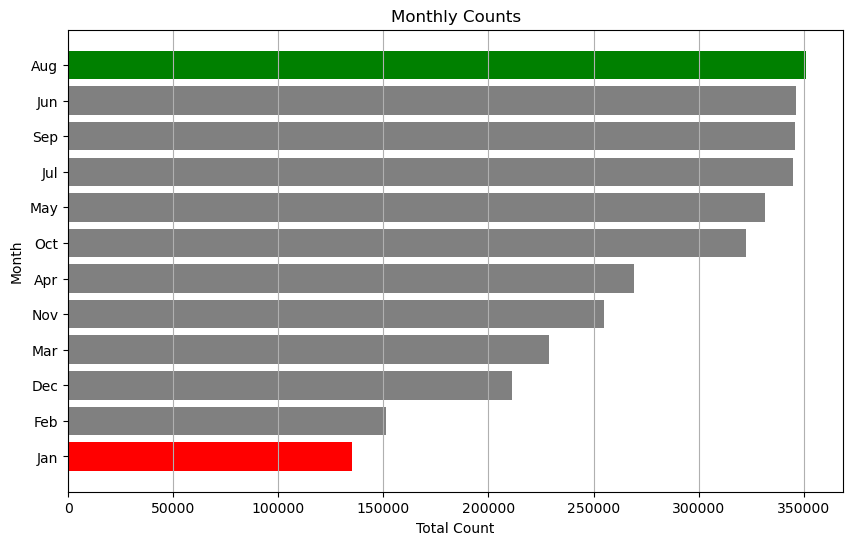

In [35]:
# Sorting the monthly counts
sorted_monthly_counts = monthly_counts.sort_values(by='total_count', ascending=True)

# Assigning colors to highest and lowest months
colors = ['red' if x in sorted_monthly_counts.head(1)['month'].values else 'green' if x in sorted_monthly_counts.tail(1)['month'].values else 'gray' for x in sorted_monthly_counts['month']]

# Creating the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_monthly_counts['month'], sorted_monthly_counts['total_count'], color=colors)
plt.title('Monthly Counts')
plt.xlabel('Total Count')
plt.ylabel('Month')
plt.grid(axis='x')
plt.show()

Dari plot in dapat dilihat bahwa bulan Januari memiliki jumlah rental sepeda terendah dan bulan Agustus memiliki jumlah rental sepeda tertinggi

### Pertanyaan 2 : Bagaimana Tren pengguna bikesharing dari Januari 2011 - Desember 2012?

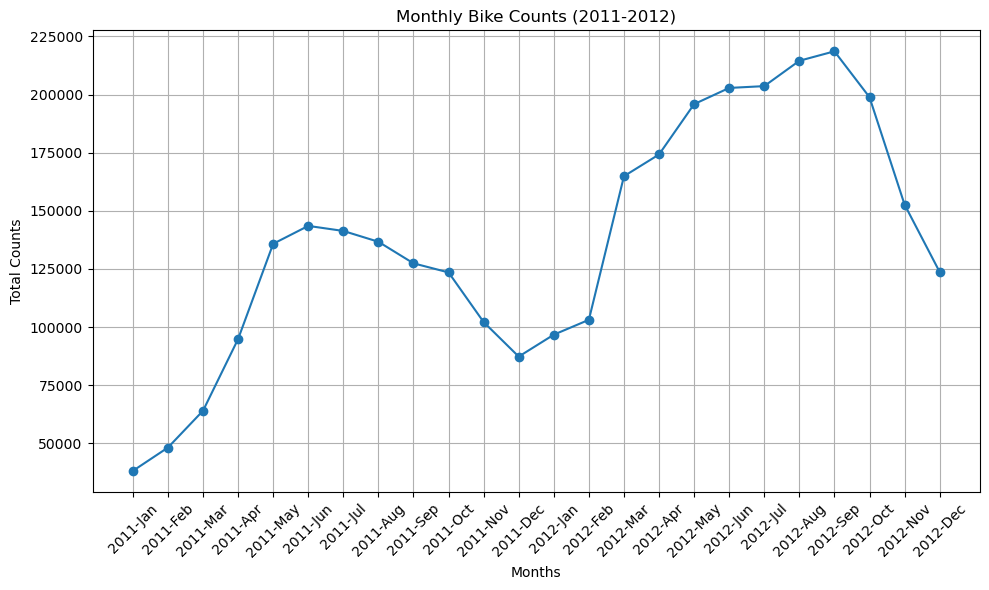

In [36]:
# jumlah total rental sepeda tiap bulan dalam setiap tahun
# Plot data
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['total_count'], marker='o', linestyle='-')

# Customize the plot
plt.title('Monthly Bike Counts (2011-2012)')
plt.xlabel('Months')
plt.ylabel('Total Counts')
plt.xticks(ticks=range(len(yearly_counts)), labels=[f"{year}-{month}" for year, month in zip(yearly_counts['year'], yearly_counts['month'])], rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

dalam rentang tahun 2011 -2012 terjadi perbedaan yang cukup tinggi dimana jumlah pengguna tahun 2012 lebih banyak dari pada tahun 2011. jika dilihat dari bulannya pengguna terbanyak di bulan September 2012

### Pertanyaan 3: Apakah ada perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan setiap bulannya?

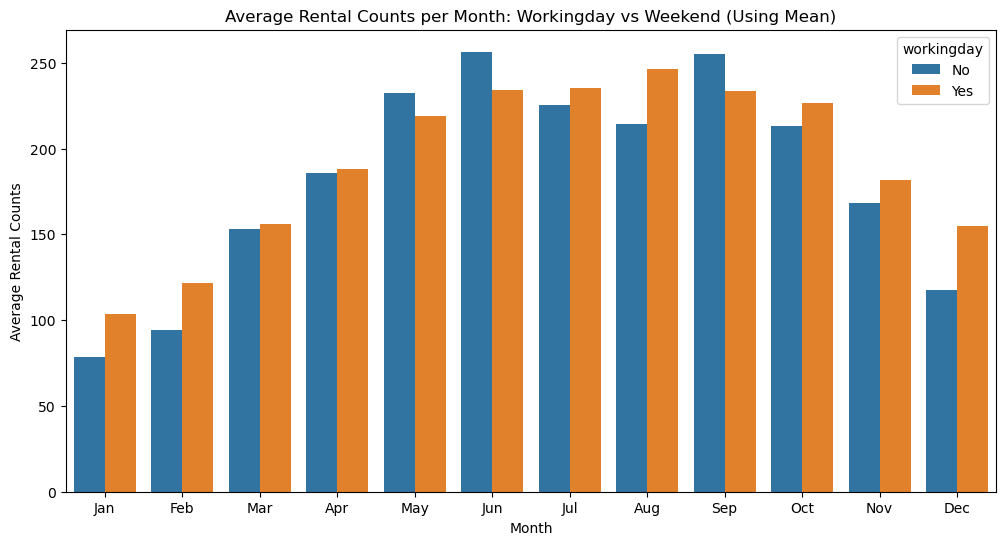

In [37]:
# Rata rata total count per bulan untuk hari kerja dan hari libur

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y=('total_count', 'mean'), hue='workingday', data=monthly_weekday_counts)

# Add title and labels
plt.title('Average Rental Counts per Month: Workingday vs Weekend (Using Mean)')
plt.xlabel('Month')
plt.ylabel('Average Rental Counts')

# Show the plot
plt.show()


Berdasarkan rata rata pengguna antara hari kerja dan weekend lebih banyak saat weekend. seperti dibulan Juni

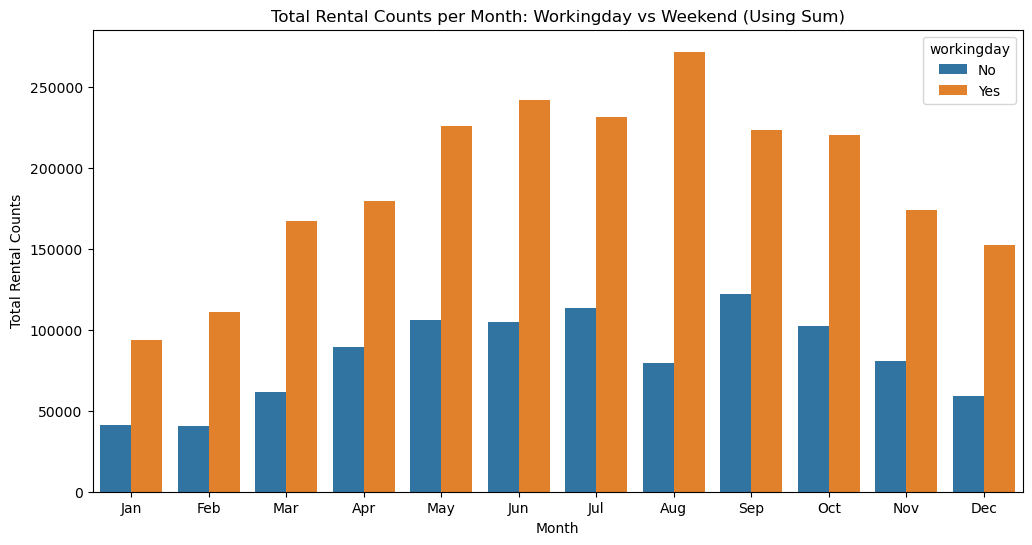

In [38]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y=('total_count', 'sum'), hue='workingday', data=monthly_weekday_counts)

# Add title and labels
plt.title('Total Rental Counts per Month: Workingday vs Weekend (Using Sum)')
plt.xlabel('Month')
plt.ylabel('Total Rental Counts')

# Show the plot
plt.show()

Jumlah pengguna lebih banyak pada hari kerja (22 hari)

### Pertanyaan 4: Pada jam berapa dalam sehari penggunaan sepeda mencapai puncaknya dan kapan penggunaan sepeda cenderung rendah?

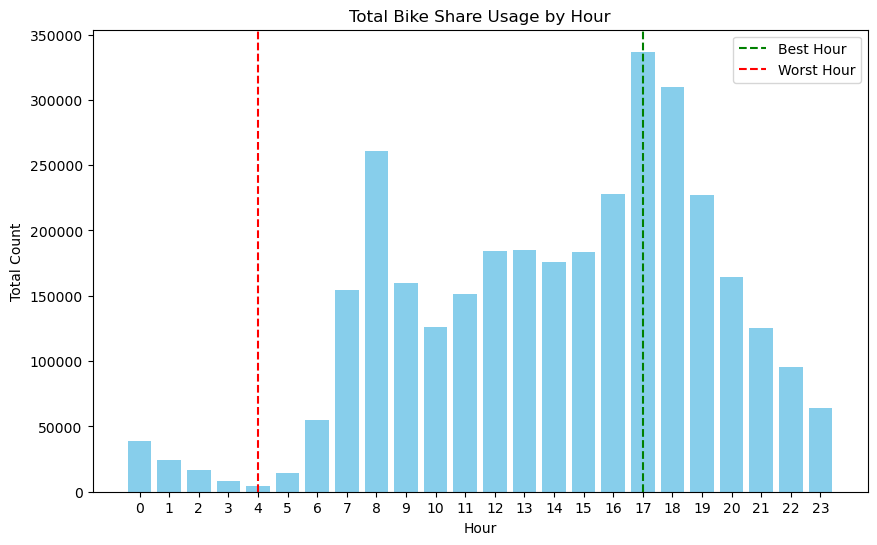

In [39]:
# Mengimpor data
hours = hourly_usage['hour']
counts = hourly_usage['total_count']

# Menentukan jam terbaik dan terburuk
best_hour = counts.idxmax()
worst_hour = counts.idxmin()

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(hours, counts, color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Total Count')
plt.title('Total Bike Share Usage by Hour')
plt.xticks(hours)
plt.axvline(x=best_hour, color='green', linestyle='--', label='Best Hour')
plt.axvline(x=worst_hour, color='red', linestyle='--', label='Worst Hour')
plt.legend()
plt.show()


pengguna bike sharing paling sering pada pukul 17 ( 5 sore) dan paling sedikit pada pukul 4 ( 4 pagi)

### Pertanyaan 5 : apakah jumlah penyewa sepeda meningkat pada musim tertentu?

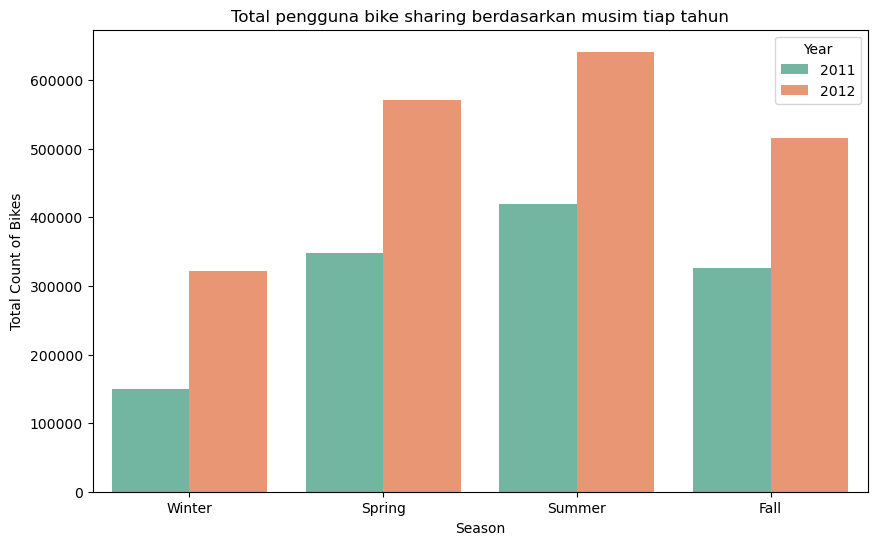

In [40]:
# Total count of bikes by season each year

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='total_count', hue='year', data=season_year, palette='Set2')
plt.title('Total pengguna bike sharing berdasarkan musim tiap tahun')
plt.xlabel('Season')
plt.ylabel('Total Count of Bikes')
plt.legend(title='Year')
plt.show()

Pengguna sepeda lebih banyak di tahun 2012 secara keseluruhan. untuk musim favorit ada pada musim panas 

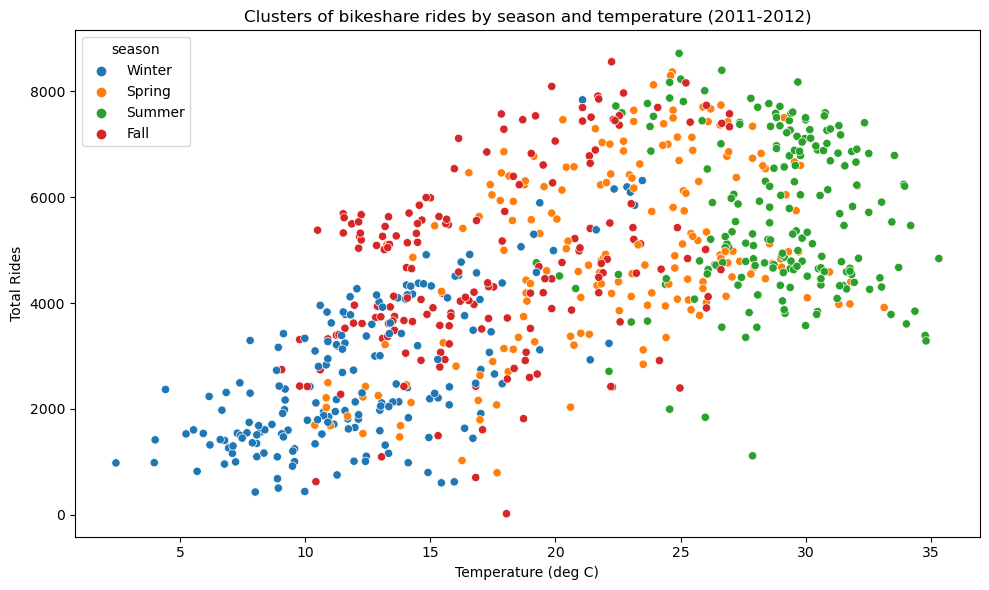

In [41]:
# Bagaiamana distribusi total pengguna terhadap temperature tiap musim?

plt.figure(figsize=(10,6))

sns.scatterplot(x='temp', y='total_count', data=seasonal_data, hue='season')

plt.xlabel("Temperature (deg C)")
plt.ylabel("Total Rides")
plt.title("Clusters of bikeshare rides by season and temperature (2011-2012)")

# Show the plot
plt.tight_layout()
plt.show()

Dari scatter plot ini jumlah pengguna yang tersebar paling banyka untuk msuim panas diikuti oleh musim semi. dimana musim dengan pengguna paling sedikit adalah musim dingin

In [42]:
# export data cleaned to csv file 
data_cleaned.to_csv('dashboard/main_data.csv', index=False)

## Conclusion

### 1. Jumlah Pengguna Tiap Bulannya
   Berdasarkan analisis data, jumlah pengguna bike sharing mengalami peningkatan dari bulan Januari hingga Mei, mencapai puncaknya pada bulan Agustus, dan kemudian mengalami penurunan dari bulan Oktober hingga Desember.
   - Pada bulan Mei, terjadi peningkatan signifikan dalam jumlah pengguna, yang mencapai puncaknya pada bulan Agustus. Pada bulan Agustus, jumlah pengguna mencapai titik tertinggi dengan total 345,991 pengguna. Sebaliknya, jumlah pengguna terendah tercatat pada bulan Januari, dengan hanya 134,933 pengguna.
Ini menunjukkan bahwa musim panas (agustus) cenderung menjadi waktu yang paling populer bagi pengguna bike sharing, sedangkan penggunaan cenderung menurun selama bulan-bulan dengan cuaca yang lebih dingin.


### 2. Analisis Jumlah Pengguna Bike Sharing (2011-2012)
   Dari data terlihat bahwa terjadi perbedaan yang signifikan dalam jumlah pengguna bike sharing antara tahun 2011 dan 2012. Jumlah pengguna secara keseluruhan cenderung meningkat dari tahun 2011 ke tahun 2012. Berikut adalah beberapa temuan utama:
  
**Tren Peningkatan Jumlah Pengguna:**
   - Jumlah pengguna bike sharing meningkat dari tahun 2011 ke tahun 2012, dengan peningkatan yang konsisten terlihat dari bulan Januari hingga September.

**Jumlah Pengguna Terbanyak:** 
   - Jumlah pengguna bike sharing mencapai puncaknya pada bulan September 2012 dengan total 218,573 pengguna. Ini menunjukkan bahwa bulan September 2012 menjadi bulan dengan aktivitas peminjaman sepeda tertinggi selama rentang waktu yang diamati.
   - Perbedaan Jumlah Pengguna antara Tahun: Tercatat bahwa jumlah pengguna bike sharing pada tahun 2012 cenderung lebih tinggi dibandingkan dengan tahun 2011 pada setiap bulannya.

### 3. Analisis Pola Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan

Dari grafik dapat dilihat terdapat perbedaan yang signifikan dalam pola penggunaan sepeda antara hari kerja dan akhir pekan setiap bulannya. Berikut adalah beberapa temuan utama:

**Perbedaan Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan:**
   - Rata-rata penggunaan sepeda pada akhir pekan cenderung lebih tinggi daripada pada hari kerja untuk setiap bulan, kecuali pada bulan Desember dimana rata-rata penggunaan sepeda pada hari kerja lebih tinggi.
   - Hal ini menunjukkan bahwa orang cenderung lebih banyak menggunakan sepeda pada akhir pekan daripada pada hari kerja.

**Tren Musiman Penggunaan Sepeda:**
   - Terdapat tren peningkatan penggunaan sepeda dari Januari hingga Juni, kemudian menurun dari Juli hingga November, dan akhirnya turun secara signifikan pada bulan Desember.
   - Puncak penggunaan sepeda biasanya terjadi pada bulan-bulan musim panas (Juni, Juli, dan Agustus), sementara penggunaan cenderung menurun pada bulan-bulan musim dingin (Desember, Januari, dan Februari).

**Variasi Antara Bulan-Bulan:**
   - Terdapat variasi yang signifikan dalam penggunaan sepeda antara bulan-bulan. Variasi ini mungkin dipengaruhi oleh faktor-faktor seperti cuaca, libur umum, dan peristiwa khusus pada bulan tersebut.

**Pengaruh Hari Kerja dan Akhir Pekan:**
  - Meskipun rata-rata penggunaan sepeda per hari lebih tinggi pada akhir pekan, jumlah total penggunaan sepeda pada hari kerja (working day) sebenarnya lebih tinggi daripada pada akhir pekan (weekend) untuk setiap bulan.
  - Hal ini disebabkan oleh jumlah hari kerja yang lebih banyak dalam satu bulan dibandingkan dengan jumlah hari akhir pekan, yang menyebabkan akumulasi jumlah penggunaan sepeda pada hari kerja menjadi lebih tinggi.
   * Total penggunaan sepeda pada hari kerja (working day) = 2292410
   * Total penggunaan sepeda pada akhir pekan (weekend) = 1000269
   * jumlah hari kerja lebih banyak dari pada hari weekend

Dengan demikian, kesimpulan yang lebih akurat adalah bahwa jumlah total pengguna sepeda cenderung lebih tinggi pada hari kerja daripada pada akhir pekan, sedangkan rata-rata penggunaan sepeda per hari lebih tinggi pada akhir pekan

###  4. Analisis pengguna bike sharing berdasarkan jam setiap hari
**Jam Terbaik (Best Performing Hour):**
   - Jam 17:00 (5:00 sore) adalah jam dengan penggunaan sepeda tertinggi, diikuti oleh jam 18:00 (6:00 sore). Ini menunjukkan bahwa banyak orang menggunakan sepeda pada sore hari, mungkin setelah bekerja atau sekolah.

**Jam Terburuk (Worst Performing Hour):**
   - Jam 4:00 pagi adalah jam dengan penggunaan sepeda terendah. Ini dapat disebabkan oleh sedikitnya aktivitas pada jam-jam dini hari, ketika kebanyakan orang tidur.

**Polanya Tren Penggunaan Sepeda:**
   - Terlihat bahwa penggunaan sepeda meningkat secara signifikan setelah jam 6:00 pagi dan mencapai puncaknya pada sore hari antara jam 17:00 dan 18:00. Setelah itu, penggunaan sepeda cenderung menurun menjelang malam.

**Potensi untuk Penyesuaian Pelayanan:**
   - Informasi ini dapat berguna bagi penyedia layanan sepeda untuk menyesuaikan penempatan sepeda, frekuensi pengambilan, dan layanan tambahan lainnya untuk memenuhi permintaan yang berfluktuasi selama hari. Misalnya, mereka dapat mempertimbangkan peningkatan pasokan sepeda pada jam-jam puncak dan pengurangan pada jam-jam dengan penggunaan rendah.

###  5. Analisis Peningkatan Jumlah Penyewa Sepeda pada Musim Tertentu
Berdasarkan grafik barchart dan scatter plot terdapat peningkatan jumlah penyewa sepeda pada musim tertentu. Berikut adalah analisisnya:

**Musim Panas Menjadi Puncak Peningkatan:** 
   - Terlihat bahwa jumlah penyewa sepeda mencapai puncaknya selama musim panas, dengan total 1,060,129 penyewa pada tahun 2011 dan 2012.
  
**Musim Semi dan Musim Gugur Mencatat Jumlah Tinggi:** 
   - Meskipun tidak sebanyak musim panas, musim semi dan musim gugur juga mencatat jumlah penyewa yang tinggi, dengan total 918,589 penyewa pada tahun 2011 dan 2012.

**Musim Dingin Menunjukkan Peningkatan yang Lebih Kecil:**
   - Musim dingin, meskipun cenderung memiliki jumlah penyewa yang lebih rendah, juga menunjukkan peningkatan dari tahun 2011 ke tahun 2012, naik dari 150,000 penyewa menjadi 321,348 penyewa.

Dengan demikian, dapat disimpulkan bahwa jumlah penyewa sepeda cenderung meningkat secara signifikan pada musim semi, musim panas, dan musim gugur, dengan musim panas menjadi puncak peningkatan. Hal ini mungkin disebabkan oleh cuaca yang lebih hangat dan kondisi yang lebih baik untuk bersepeda selama musim tersebut.

